<a href="https://colab.research.google.com/github/Marc-F-94/altair-tutorial/blob/master/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from skimage.segmentation import slic
from skimage.segmentation.boundaries import find_boundaries
from skimage.util.dtype import convert, img_as_float
from skimage.color.colorconv import gray2rgb
from skimage.morphology.grey import dilation
from skimage.morphology.selem import square
uploaded = files.upload() # Here, you can browse and upload an image from your
                          # computer.  

Saving 2889.jpeg to 2889 (2).jpeg


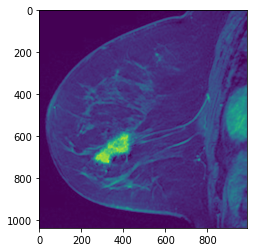

In [25]:
image=plt.imread('2889.jpeg')
image.shape
plt.imshow(image) # Use plt to show your resulting image
             # do not forget to give the resulting segmentaion
             # as an input

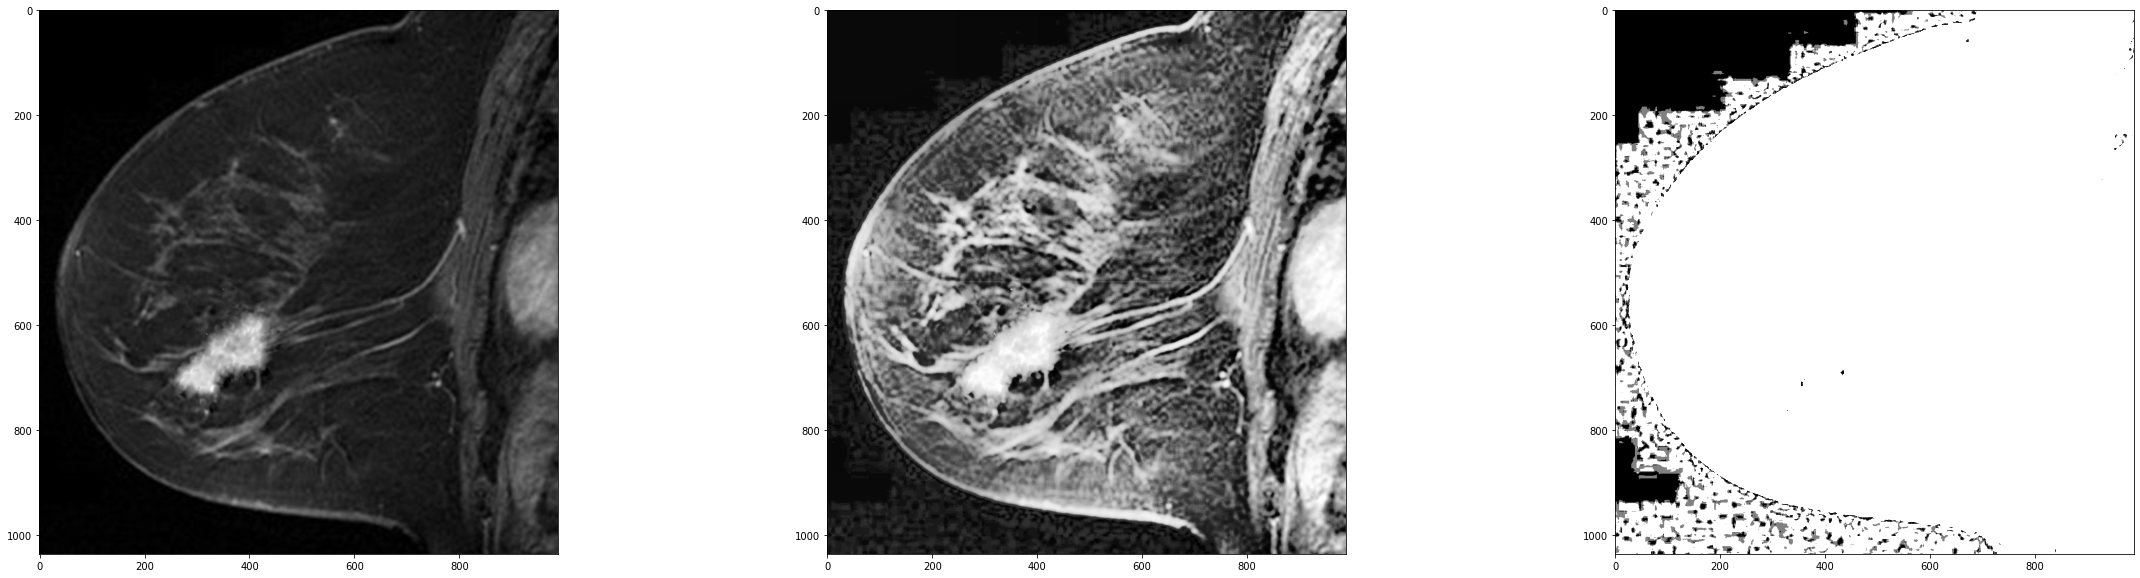

In [34]:

clahe_image              = clahe(image,clip=8,tile=4)

plt.figure(figsize=(40,10))
plt.subplot(131), plt.imshow(image,       cmap='gray')
plt.subplot(132), plt.imshow(clahe_image, cmap='gray')
plt.subplot(133), plt.imshow(mask,        cmap='gray', vmin=0, vmax=2)
plt.show()

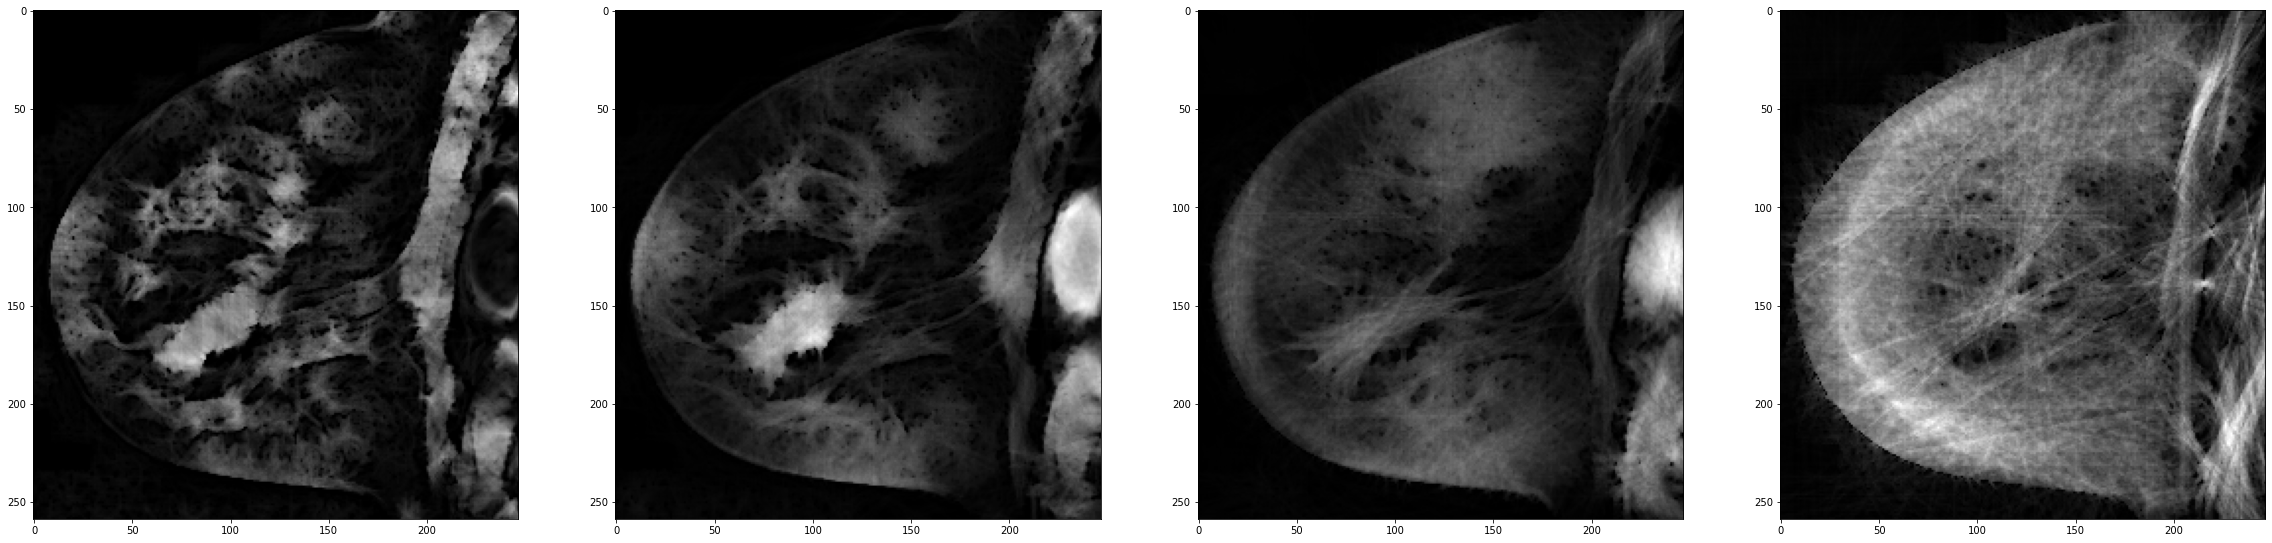

In [37]:
import math
# Morphological Enhancement
down_img     = cv2.resize(clahe_image, None, fx = 1/4, fy = 1/4, interpolation = cv2.INTER_CUBIC)
down_mask    = cv2.resize(mask, None, fx = 1/4, fy = 1/4, interpolation = cv2.INTER_CUBIC)
sifted_image = multi_scale_morphological_sifters(down_img,4,18,15,3689,70/1000)

plt.figure(figsize=(40,20))
plt.subplot(141), plt.imshow(sifted_image[0], cmap='gray')
plt.subplot(142), plt.imshow(sifted_image[1], cmap='gray')
plt.subplot(143), plt.imshow(sifted_image[2], cmap='gray')
plt.subplot(144), plt.imshow(sifted_image[3], cmap='gray')
plt.show()

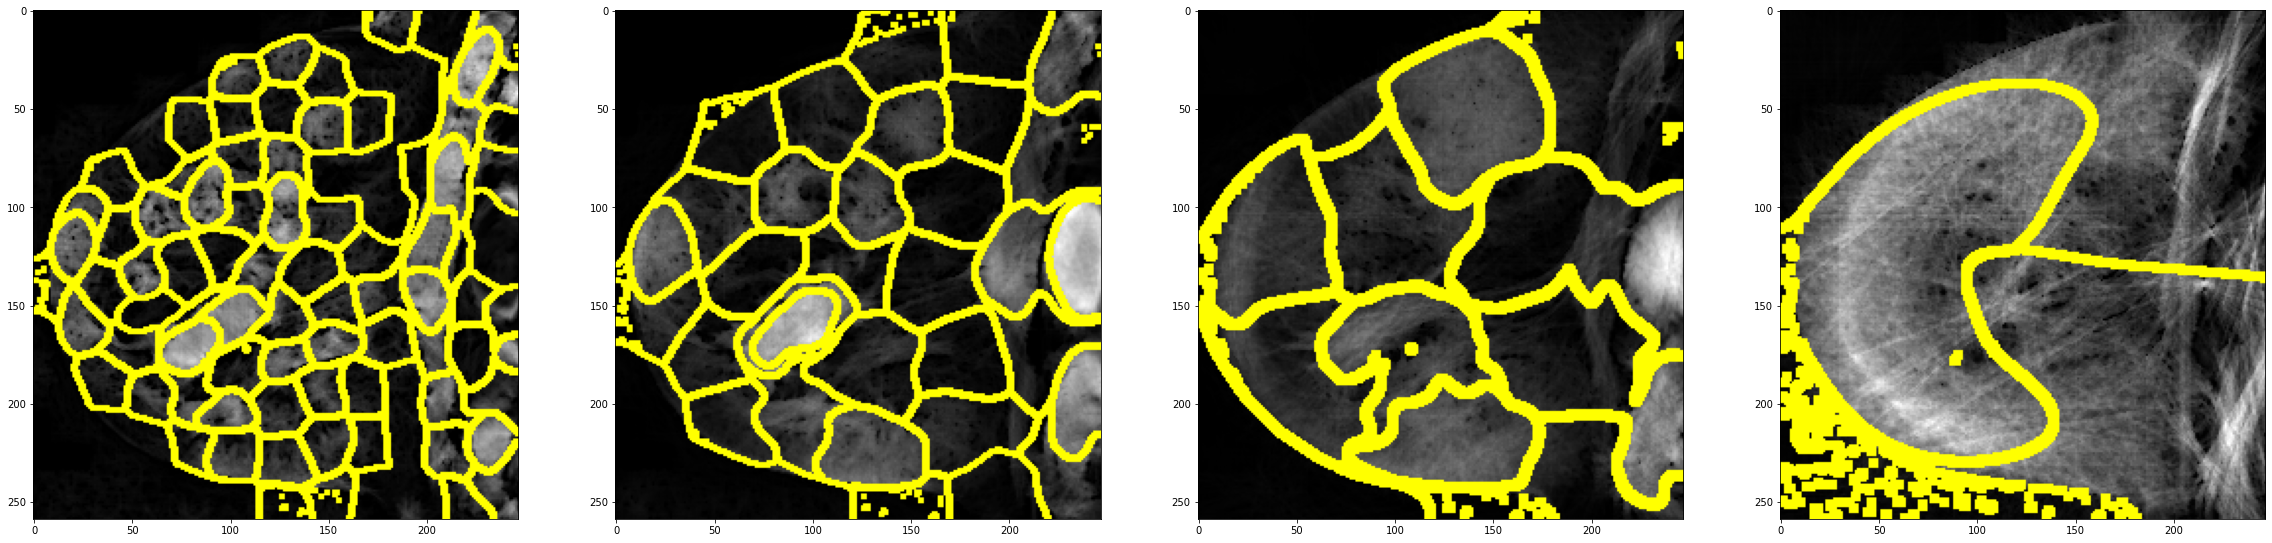

In [38]:

num_pixels        = 4*sifted_image[1].shape[0]*sifted_image[1].shape[1]*70/1000 
DImin             = (math.sqrt(15/math.pi))    # Calculate Minimum Diameter
DImax             = (math.sqrt(3689/math.pi))  # Calculate Maximum Diameter
num_segments      = (np.divide(num_pixels,(np.multiply([12,20,36,62],[12,20,36,62])))).astype(np.int32)
sigma             = [5,5,5,20]
compact_factor    = [10000,10000,10000,8000]
superpixel_thresh = [35,70,250,1000]
                                                                                   
superpixels       = []
for i in range(4):
    # SLIC Superpixel Segmentation
    sift_superpixel = slic(sifted_image[i].astype(np.float), n_segments=num_segments[i], 
                           compactness=compact_factor[i],    sigma=sigma[i])
    sift_superpixel[down_mask==0] = 0   # Mask Out Background Superpixels
    # For Each Superpixel in Breast
    for j in range(sift_superpixel.max()):      
        candidate_superpixel = (sift_superpixel == j)
        total_intensities    = np.sum(np.multiply(sifted_image[i].astype(np.float)/65535,candidate_superpixel))
        if (total_intensities < superpixel_thresh[i]):  sift_superpixel[sift_superpixel==j] = 0
    superpixels.append(sift_superpixel)

plt.figure(figsize=(40,20))
plt.subplot(141), plt.imshow(mark_boundaries(sifted_image[0]/65535, superpixels[0], line_width=3),cmap='gray')
plt.subplot(142), plt.imshow(mark_boundaries(sifted_image[1]/65535, superpixels[1], line_width=3),cmap='gray')
plt.subplot(143), plt.imshow(mark_boundaries(sifted_image[2]/65535, superpixels[2], line_width=5),cmap='gray')
plt.subplot(144), plt.imshow(mark_boundaries(sifted_image[3]/65535, superpixels[3], line_width=5),cmap='gray')
plt.show()